In [49]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
# CSV File - Read
df = pd.read_csv('C:\\Users\\hp\\Downloads\LGD_DATA.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.shape)




(15290, 7)


In [50]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [51]:
df.describe()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,149961.789339,42.328254,23.732897,2.495880,389.859718
std,28947.841061,18.280511,17.850707,0.953776,253.729433
min,100002.000000,16.000000,0.000000,1.000000,12.534521
25%,124900.500000,24.000000,6.000000,2.000000,226.434217
50%,149897.500000,42.000000,23.000000,2.000000,354.937874
75%,175019.500000,61.000000,42.000000,3.000000,488.676927
max,200454.000000,70.000000,53.000000,4.000000,3500.000000


In [52]:
import numpy as np
# Categorise Rating to Binary
df['RatingScore'] = np.where(df['Losses in Thousands']>=350, 1, 0)
print(df.head())

    Ac_No  Age  Years of Experience  Number of Vehicles Gender  Married  \
0  150024   24                    5                   1      M  Married   
1  144880   31                   10                   1      F   Single   
2  133742   56                   37                   1      M  Married   
3  151282   52                   31                   1      F  Married   
4  174407   20                    3                   1      M   Single   

   Losses in Thousands  RatingScore  
0           203.319595            0  
1           402.197302            1  
2           553.132096            1  
3           292.430579            0  
4           246.540576            0  


In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, 4] = labelencoder.fit_transform(df.iloc[:, 4])
df.iloc[:, 5] = labelencoder.fit_transform(df.iloc[:, 5])

In [54]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,RatingScore
0,150024,24,5,1,1,0,203.319595,0
1,144880,31,10,1,0,1,402.197302,1
2,133742,56,37,1,1,0,553.132096,1
3,151282,52,31,1,0,0,292.430579,0
4,174407,20,3,1,1,1,246.540576,0


In [55]:
dfInput = df.iloc[:,2:6] # 0  is not required
dfoutput = df.iloc[:,-1]

In [56]:
split = int(0.8*len(df))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]
model = LogisticRegression()
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [57]:
from sklearn import preprocessing
from sklearn import utils

model = model.fit(X_train,Y_train )
ms = model.score(X_train,Y_train)
print("model score::",ms)

probability = model.predict_proba(X_test)
print(probability)
print("*" * 100)
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

model score:: 0.6999672988881622
[[0.56614822 0.43385178]
 [0.27426152 0.72573848]
 [0.12331637 0.87668363]
 ...
 [0.92143939 0.07856061]
 [0.31041141 0.68958859]
 [0.48298395 0.51701605]]
****************************************************************************************************
Confusion Matrix
[[1022  463]
 [ 452 1121]]


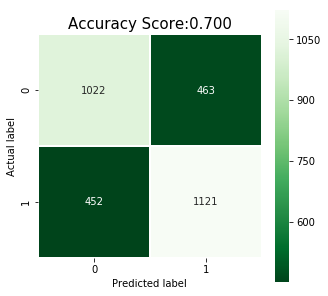

In [58]:
import seaborn as sns
cm = metrics.confusion_matrix(Y_test , predicted)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

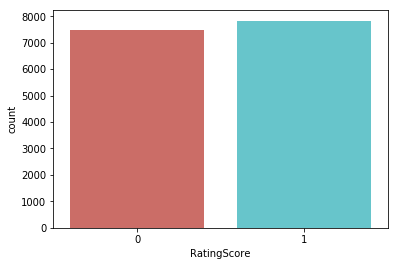

In [59]:
sns.countplot(x='RatingScore',data=df, palette='hls')

In [60]:
print(metrics.classification_report(Y_test, predicted))

             precision    recall  f1-score   support

          0       0.69      0.69      0.69      1485
          1       0.71      0.71      0.71      1573

avg / total       0.70      0.70      0.70      3058



0.7761216744687819


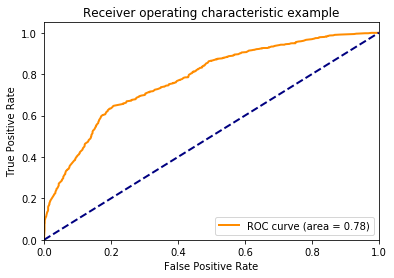

In [69]:
from sklearn import metrics
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
fpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()